In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob

# OFF

In [3]:
path =r'E:\esp\ml\off'
files = glob.glob(path +'/*.csv')

In [17]:
dfs =[]
for i in files:
    df= pd.read_csv(i)
    dropped =df.iloc[2:] # drop first 2 rows
    col_drop =dropped.iloc[:,:-3] # drop last 3 columns
    trancated=col_drop.T
    # tra =trancated.iloc[:,:1]

    dfs.append(trancated)

In [19]:
dfs[3]

,2,3,4,5,6,7,8,9,10,11,12
#!,476,374,385,379,408,404,439,426,468,507,535


In [68]:
off=pd.concat(dfs,ignore_index=True)
off= off.iloc[:,:-3]
off= off.drop([4,7])
off=off.fillna(value=540)
# convert to float 32
off= off.astype(np.float32)
off

,2,3,4,5,6,7,8,9,10
0,535.0,453.0,488.0,504.0,409.0,413.0,457.0,498.0,526.0
1,496.0,496.0,380.0,386.0,436.0,476.0,522.0,540.0,542.0
2,427.0,472.0,423.0,364.0,396.0,434.0,484.0,513.0,541.0
3,476.0,374.0,385.0,379.0,408.0,404.0,439.0,426.0,468.0
5,458.0,502.0,494.0,375.0,409.0,430.0,469.0,487.0,522.0
6,544.0,368.0,423.0,468.0,532.0,402.0,369.0,397.0,437.0
8,475.0,358.0,367.0,379.0,486.0,415.0,458.0,499.0,525.0
9,500.0,352.0,388.0,368.0,484.0,390.0,405.0,466.0,480.0
10,336.0,402.0,369.0,414.0,349.0,360.0,387.0,406.0,448.0
11,454.0,356.0,446.0,500.0,446.0,488.0,511.0,533.0,540.0


In [69]:
off =off.iloc[:,:-2]
off['target'] = 0
off

,2,3,4,5,6,7,8,target
0,535.0,453.0,488.0,504.0,409.0,413.0,457.0,0
1,496.0,496.0,380.0,386.0,436.0,476.0,522.0,0
2,427.0,472.0,423.0,364.0,396.0,434.0,484.0,0
3,476.0,374.0,385.0,379.0,408.0,404.0,439.0,0
5,458.0,502.0,494.0,375.0,409.0,430.0,469.0,0
6,544.0,368.0,423.0,468.0,532.0,402.0,369.0,0
8,475.0,358.0,367.0,379.0,486.0,415.0,458.0,0
9,500.0,352.0,388.0,368.0,484.0,390.0,405.0,0
10,336.0,402.0,369.0,414.0,349.0,360.0,387.0,0
11,454.0,356.0,446.0,500.0,446.0,488.0,511.0,0


# ON

In [25]:
on_path= r'E:\esp\ml\on'
on_files = glob.glob(on_path+"/*.csv")

In [50]:
on_dfs=[]
for i in on_files:
    df= pd.read_csv(i)
    df=df.iloc[2:]
    df=df.iloc[:,:-3]
    df=df.astype(int)
    df=df.T

    on_dfs.append(df)

In [51]:
on_dfs[2]

,2,3,4,5,6,7
#!,469,542,512,522,529,543


In [58]:
on = pd.concat(on_dfs,ignore_index=True)

on=on.fillna(on.bfill()+13)
on=on.fillna(value=562)
on=on.astype(np.float32)
on.dtypes


2    float32
3    float32
4    float32
5    float32
6    float32
7    float32
dtype: object

In [64]:
on[8] = 567
on['target'] =1

In [65]:
on

,2,3,4,5,6,7,8,target
0,536.0,515.0,559.0,559.0,542.0,556.0,567,1
1,524.0,502.0,546.0,546.0,542.0,556.0,567,1
2,469.0,542.0,512.0,522.0,529.0,543.0,567,1
3,519.0,545.0,535.0,542.0,550.0,550.0,567,1
4,488.0,486.0,529.0,533.0,537.0,537.0,567,1
5,475.0,511.0,540.0,542.0,557.0,562.0,567,1
6,471.0,457.0,540.0,542.0,557.0,562.0,567,1
7,492.0,541.0,536.0,542.0,557.0,562.0,567,1
8,540.0,528.0,523.0,529.0,544.0,562.0,567,1
9,533.0,538.0,534.0,543.0,557.0,562.0,567,1


In [72]:
data = pd.concat([on,off],ignore_index=True)
data=data.sample(frac=1,ignore_index=True)
data

,2,3,4,5,6,7,8,target
0,476.0,374.0,385.0,379.0,408.0,404.0,439.0,0
1,427.0,472.0,423.0,364.0,396.0,434.0,484.0,0
2,471.0,457.0,540.0,542.0,557.0,562.0,567.0,1
3,544.0,368.0,423.0,468.0,532.0,402.0,369.0,0
4,500.0,352.0,388.0,368.0,484.0,390.0,405.0,0
5,533.0,538.0,534.0,543.0,557.0,562.0,567.0,1
6,496.0,496.0,380.0,386.0,436.0,476.0,522.0,0
7,488.0,486.0,529.0,533.0,537.0,537.0,567.0,1
8,458.0,502.0,494.0,375.0,409.0,430.0,469.0,0
9,469.0,542.0,512.0,522.0,529.0,543.0,567.0,1


In [73]:
x= data.drop('target', axis=1)
y = data['target']

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.7)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((15, 7), (15,), (7, 7), (7,))

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
clf.score(x_test,y_test)

1.0

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
y_pred=clf.predict(x_test)
y

0     0
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    1
12    1
13    0
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    1
Name: target, dtype: int64

In [94]:
acc= accuracy_score(y_test,y_pred)
acc

1.0

In [96]:
cla_repo = classification_report(y_test,y_pred)
print(cla_repo)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [97]:
con_mat= confusion_matrix(y_test,y_pred)
print(con_mat)

[[5 0]
 [0 2]]


In [98]:
import seaborn as sns

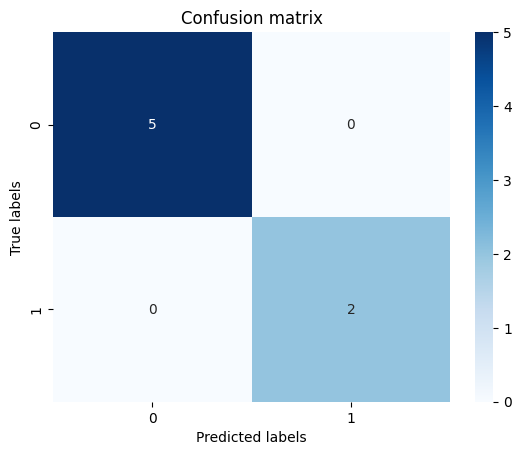

In [99]:
sns.heatmap(con_mat, annot=True, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()

# convert to C model

In [103]:
from micromlgen import port
c=port(clf=clf, classname='RandomForestClassifier')


In [104]:
print(c)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForestClassifier {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[5] <= 506.5) {
                            votes[0] += 1;
                        }

                        else {
                            votes[1] += 1;
                        }

                        // tree #2
                        if (x[5] <= 506.5) {
                            votes[0] += 1;
                        }

                        else {
                            votes[1] += 1;
                        }

                        // tree #3
                        if (x[1] <= 499.0) {
                            if (x[2] <= 514.0) {
        